In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE

plt.style.use('fivethirtyeight')

import joblib

import data

In [8]:
data=pd.read_csv(r'D:\CS & ML\ML Courses\Depi\Project\data\diabetes.csv')

### Explore data

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


show information data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [13]:
data.duplicated().sum()

0

### ***Analysis***

In [14]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

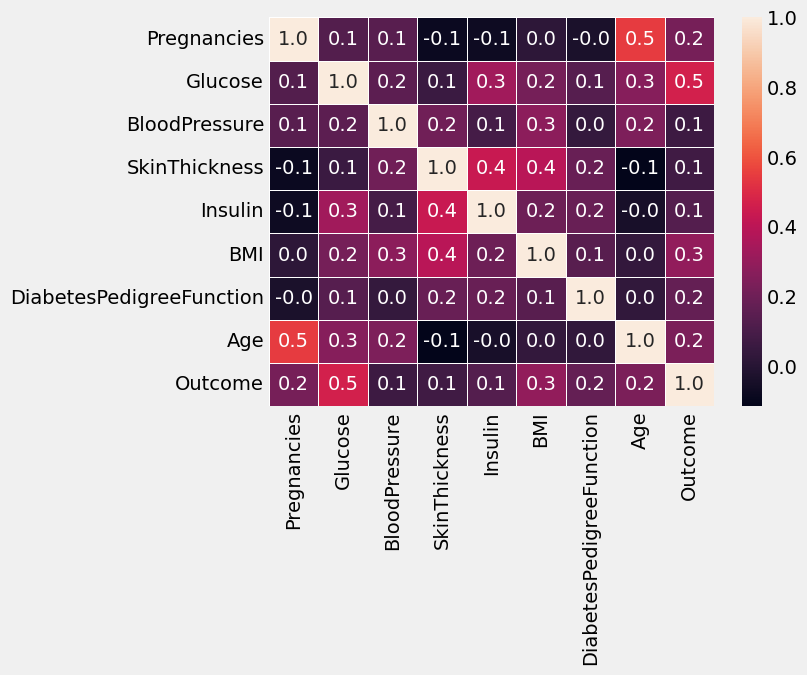

In [15]:
sns.heatmap(data.corr(),annot=True ,fmt="0.1f",linewidth=.5)

C:\Users\Eng-Ahmed\AppData\Local\Temp\ipykernel_4292\4209277614.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome",data=data,palette=["r","b"])


<Axes: xlabel='Outcome', ylabel='count'>

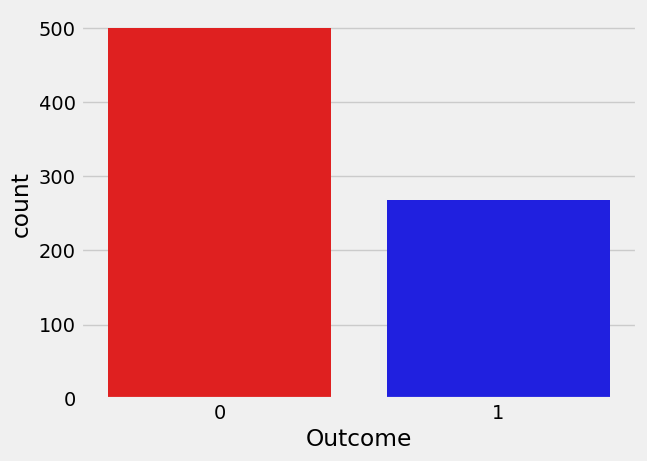

In [16]:
sns.countplot(x="Outcome",data=data,palette=["r","b"])

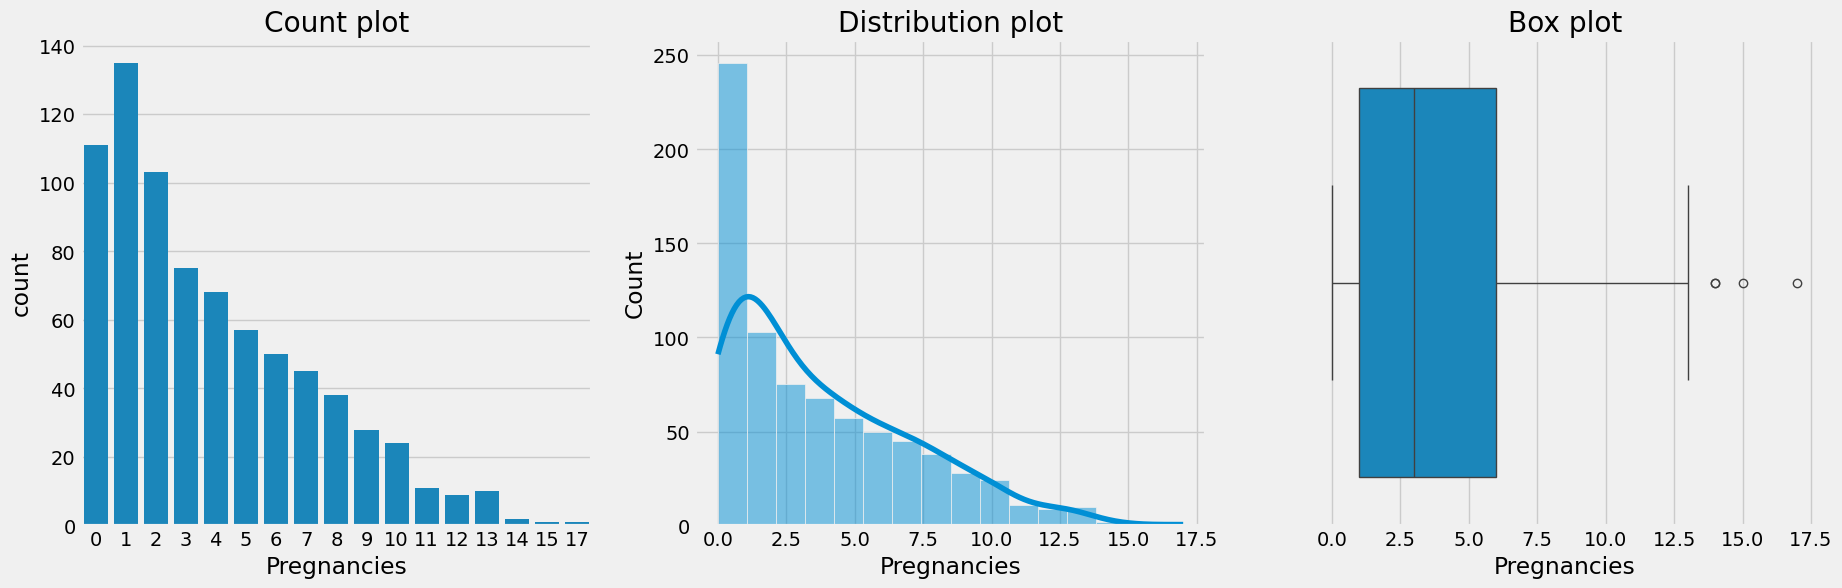

In [17]:
plt.figure(figsize=(20,6))

# Subplot 1: Count plot
plt.subplot(1, 3, 1)
plt.title("Count plot")
sns.countplot(x="Pregnancies", data=data)


plt.subplot(1, 3, 2)
plt.title("Distribution plot")
sns.histplot(data["Pregnancies"],kde=True)  # `distplot` is deprecated, so `histplot` is recommended

# Subplot 3: Box plot
plt.subplot(1, 3, 3)
plt.title("Box plot")
sns.boxplot(x="Pregnancies", data=data)

plt.show()

<Axes: ylabel='Age'>

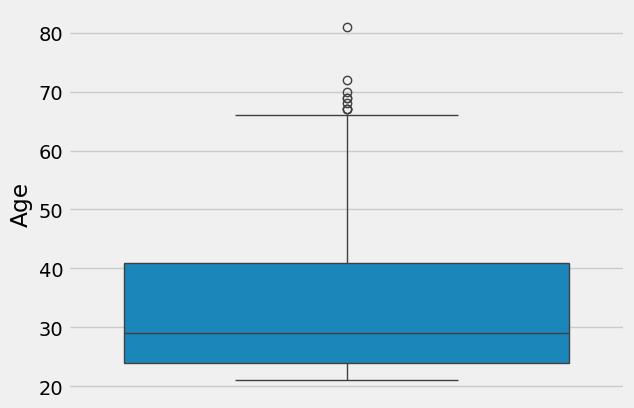

In [18]:
sns.boxplot(data.Age)

In [19]:
def cap_outliers_iqr(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # حساب IQR
    IQR = Q3 - Q1

    # تحديد النطاق المقبول للقيم
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # تعديل القيم التي تتجاوز النطاق
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)

    return df


Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age

In [20]:
data= cap_outliers_iqr(data, "Age")
data= cap_outliers_iqr(data, "Pregnancies")
data= cap_outliers_iqr(data, "Glucose")
data= cap_outliers_iqr(data, "BloodPressure")
data= cap_outliers_iqr(data, "SkinThickness")
data= cap_outliers_iqr(data, "Insulin")
data= cap_outliers_iqr(data, "BMI")
data= cap_outliers_iqr(data, "DiabetesPedigreeFunction")


<Axes: ylabel='Age'>

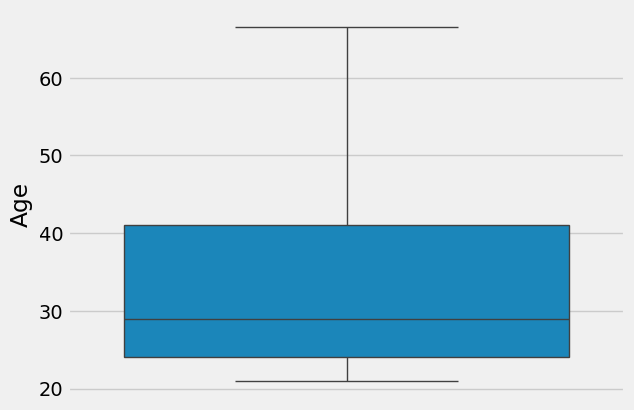

In [21]:
sns.boxplot(data.Age)


<Axes: ylabel='BMI'>

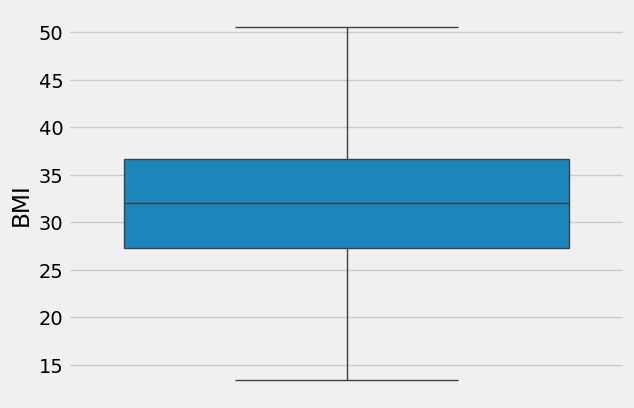

In [22]:
sns.boxplot(data.BMI)

# **create** **model**

In [23]:
y=data["Outcome"]
x=data.drop("Outcome",axis=1)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [25]:
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [26]:
model=LogisticRegression(max_iter=300,class_weight='balanced')
model.fit(x_train_resampled,y_train_resampled)

LogisticRegression(class_weight='balanced', max_iter=300)

In [27]:
pre=model.predict(x_test)

In [28]:
accuracy_score(pre,y_test)

0.7597402597402597

In [29]:
recall_score(pre,y_test)

0.5789473684210527

In [30]:
f1_score(pre,y_test)

0.6407766990291263

In [31]:
confusion_matrix(pre,y_test)

array([[84, 13],
       [24, 33]], dtype=int64)

In [32]:

modelr = RandomForestClassifier(3000,class_weight='balanced')
modelr.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', n_estimators=3000)

In [33]:
pre=modelr.predict(x_test)

In [34]:
accuracy_score(pre,y_test)

0.7467532467532467

In [35]:
confusion_matrix(pre,y_test)

array([[81, 12],
       [27, 34]], dtype=int64)

In [36]:
modelknn = KNeighborsClassifier(n_neighbors=4)
modelknn.fit(x_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=4)

In [37]:
pre=modelknn.predict(x_test)

In [38]:
accuracy_score(pre,y_test)

0.7207792207792207

In [39]:
confusion_matrix(pre,y_test)

array([[84, 19],
       [24, 27]], dtype=int64)

In [40]:
joblib.dump(modelknn, 'Diabetes_predictingknn.joblib')

['Diabetes_predictingknn.joblib']

In [41]:
modelMLPCl = MLPClassifier(max_iter=500)
modelMLPCl.fit(x_train, y_train)

MLPClassifier(max_iter=500)

In [42]:
pre=modelMLPCl.predict(x_test)
accuracy_score(pre,y_test)

0.6623376623376623

In [43]:
confusion_matrix(pre,y_test)

array([[72, 16],
       [36, 30]], dtype=int64)